# **Group Description**

**Group No: 25 Based on Spreadsheet**

**Group Name: ABRACADABRA**

**Team Member Details~**

1. Saad Ahmed Pathan (22114077)
2. Samio Ayman (22082403)
3. Nur Shaheila Ashriza Binti Mohd Saupi (22001745)
4. Nurina Humaira Binti Mohd Romzan (22002204)
5. Nur Aina Batrisyia Binti Zakaria (23005013)
6. Siti Hajar Binti Mohd Nor Azman (22002035)


# **1. Project Designing**

Electricity is essential for economic and social development, enabling nations to achieve higher living standards.

In today's world, effective planning and operation of electricity production, revenue generation from production, and energy consumption are imperative. Understanding how energy generates revenue and is utilized by consumers is crucial for better management. This presents an opportunity to develop a supervised machine learning model to forecast future electricity revenues.


1. Initial Phase: We brainstormed the problem and potential approaches to solve it using machine learning concepts. Then, we designed the workflow of our project.


2. Data Mining: We extracted a dataset from Data.gov, covering data from 2015 to 2022. The dataset includes revenue, units sold, and the average number of customers, categorized by customer class for each electric utility operating in Iowa, USA.


3. Data Preprocessing: We understood the data and identified some null values in the dataset, receiving a detailed description of the characteristics involved.


4. Feature Discussion: We discussed and renamed features for better readability and understanding, facilitating a smoother data environment.


5. Exploratory Data Analysis (EDA) and Visualization: EDA and visualization provided concise knowledge of the link between features and the label (the dependent variable). The heatmap was used to understand the association between independent variables, helping to choose important features. Selecting the right elements to improve accuracy was challenging.

6. Feature Selection: We decided to use PCA for feature selection, ultimately choosing PC1 as the feature for our project.

7. Model Training and Assessment: We employed Linear Regression, Random Forest Regression, Neural Network Regression, Decision Tree, and XGBoost techniques. After comparing numerous metrics, we determined that the Random Forest Regressor produced the best results.

8. Model Explainability: We used a bar chart to compare the performance of all five models, assisting in selecting the best one. The Random Forest Regressor emerged as the best model for our dataset.

9. Conclusion: We summarized our project, from model selection and evaluation to finding the most suitable model for our dataset. We also highlighted key findings from each model with their respective values.



**Problem Statement**

The goal is to develop a machine learning model capable of accurately forecasting electricity revenues based on the provided features. This model is valuable for utility companies, energy firms, and policymakers who need to optimize electricity consumption, reduce costs, and minimize the environmental impact of energy usage.

Specifically, the model should reliably predict electricity revenues by considering various factors influencing energy consumption, such as consumer types and the number of consumers. This can help utility companies, building managers, and energy firms identify patterns and trends in energy consumption, enabling them to make informed energy decisions. Policymakers can also use this data to create regulations and incentives that promote energy efficiency and sustainability.


# **2. Data Mining**

The dataset used for this project is acquired from the website Data.gov. Data.gov is a comprehensive and open data portal maintained by the United States government. It serves as a centralized repository for accessing a wide range of government datasets, providing the public, researchers, and developers with valuable information for analysis, innovation, and transparency.


The dataset titled **"Electric Utilities Revenue, Units Sold, and Customers by Year"** covers data from 2015 to 2022, detailing the revenue, units sold, and average number of customers categorized by customer class for each electric utility operating in the state of Iowa, USA. This publicly accessible dataset aims to provide insights into the performance and customer base of electric utilities in Iowa. However, no specific license information is provided for this dataset.

**Columns Description**

1. Reporting Year

2. Company Number & Year

3. Type of Utility

4. Utility

5. Operating Revenues - Residential Sales

6. Operating Revenues - Commercial & Industrial Sales
7. Operating Revenues - Sales for Resale

8. Operating Revenues - All Other Sales

9. MWh Sold - Residential

10. MWh Sold - Commercial & Industrial

11. MWh Sold - Sales for Resale

12. MWh Sold - All Other

13. Average No. of Customers - Residential

14. Average No. of Customers - Commercial & Industrial

15. Average No. of Customers - Sales for Resale

16. Average No. of Customers - All Other


**Dataset Source Link**

https://catalog.data.gov/dataset/electric-utilities-revenue-units-sold-and-customers-by-year

# **3. Data Preprocessing**

In [98]:
# Line Wrapping in Collaboratory Google results
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

Check for missing values, outliers, and inconsistencies in the dataset and handle them appropriately. Missing values can be imputed or dropped based on the extent of missingness and their impact on the analysis.

In [99]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [100]:
# To import datetime library
from datetime import datetime
import datetime as dt

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

In [101]:
# Import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

# Libraries for save the model
import pickle

In [102]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Load the dataset
file_path = '/content/drive/MyDrive/Machine Learning Project/electricity_consumption_data.csv'

df = pd.read_csv(file_path)

In [104]:
# Display the shape of the data
df.shape

(1467, 15)

In [105]:
# Display the first few rows to understand the data
print(df.head())

     RY                      ToU                                   U  \
0  2015       Municipal Electric                              Auburn   
1  2015  Investor Owned Electric  Interstate Power and Light Company   
2  2015  Investor Owned Electric          MidAmerican Energy Company   
3  2015  Investor Owned Electric       Amana Society Service Company   
4  2015       Municipal Electric                          Bloomfield   

         ORoRS       ORoCIS        ORoSR      ORoAOS      ASforR      ASforCI  \
0     232546.0          0.0          0.0     12494.0     1646.39         0.00   
1  521115322.0  846803408.0   74454294.0  11626180.0  3661188.00  10691600.00   
2  535517779.0  792025980.0  158876153.0  96997319.0  5490294.00  14032377.00   
3     894691.0    6971861.0          0.0     76411.0     7095.91     84452.11   
4    1647288.0    1503769.0          0.0     86996.0    11501.42     14118.17   

     ASforSR     ASforAO   ANoCR  ANoCCI  ANoCSR  ANoCAO  
0        0.0      103

In [106]:
df.head(5)

,RY,ToU,U,ORoRS,ORoCIS,ORoSR,ORoAOS,ASforR,ASforCI,ASforSR,ASforAO,ANoCR,ANoCCI,ANoCSR,ANoCAO
0,2015,Municipal Electric,Auburn,232546.0,0.0,0.0,12494.0,1646.39,0.00,0.0,103.25,175,0,0.0,10
1,2015,Investor Owned Electric,Interstate Power and Light Company,521115322.0,846803408.0,74454294.0,11626180.0,3661188.00,10691600.00,1779026.0,53530.00,408969,78348,6.0,1040
2,2015,Investor Owned Electric,MidAmerican Energy Company,535517779.0,792025980.0,158876153.0,96997319.0,5490294.00,14032377.00,7907806.0,1399758.00,568142,81892,5.0,12764
3,2015,Investor Owned Electric,Amana Society Service Company,894691.0,6971861.0,0.0,76411.0,7095.91,84452.11,0.0,853.85,714,302,0.0,24
4,2015,Municipal Electric,Bloomfield,1647288.0,1503769.0,0.0,86996.0,11501.42,14118.17,0.0,1328.69,1123,268,0.0,1


In [107]:
df.iloc[745 : 751]

,RY,ToU,U,ORoRS,ORoCIS,ORoSR,ORoAOS,ASforR,ASforCI,ASforSR,ASforAO,ANoCR,ANoCCI,ANoCSR,ANoCAO
745,2019,Municipal Electric,Cascade,846082.0,773424.0,0.0,216231.0,7694.0,8566.0,0.0,2281.0,949,162,0.0,32
746,2019,Municipal Electric,Cedar Falls,16139447.0,18557187.0,7804705.0,3410151.0,170532.0,259510.0,318313.0,55319.0,17128,2251,NaN,146
747,2019,Municipal Electric,Coon Rapids,753173.0,433337.0,819096.0,282901.0,7272.0,3735.0,10971.0,3153.0,606,139,1.0,45
748,2019,Municipal Electric,Corning,799057.0,466112.0,0.0,567172.0,8467.0,4685.0,0.0,6218.0,745,218,0.0,60
749,2019,Municipal Electric,Graettinger,465112.0,366380.0,296337.0,18748.0,5056.0,4233.0,0.0,201.0,415,90,0.0,12
750,2019,Municipal Electric,Harlan,3036282.0,2952865.0,233785.0,363609.0,24161.0,30765.0,9188.0,4042.0,2305,472,NaN,84


In [108]:
df.tail(5)

,RY,ToU,U,ORoRS,ORoCIS,ORoSR,ORoAOS,ASforR,ASforCI,ASforSR,ASforAO,ANoCR,ANoCCI,ANoCSR,ANoCAO
1462,2022,Distribution Cooperative,T. I. P. Rural Electric Cooperative,10635839.00,5744518.00,0.00,113722.00,83301.0,65148.0,0.0,41.0,6160,334,0.0,41
1463,2022,Distribution Cooperative,The Calhoun County Electric Coop. Assn.,4435962.89,799995.49,519366.76,17749.09,31460.0,6956.0,6268.0,0.0,1671,24,2.0,0
1464,2022,Distribution Cooperative,"United Electric Cooperative, Inc.",1021956.00,111639.00,0.00,0.00,6548.0,930.0,0.0,0.0,435,18,0.0,0
1465,2022,Distribution Cooperative,Western Iowa Power Cooperative,9256408.00,4986241.00,0.00,129131.00,67410.0,37252.0,0.0,601.0,3930,1605,0.0,43
1466,2022,Distribution Cooperative,Woodbury County Rural Electric Cooperative,8264596.00,2162619.00,0.00,19479.00,57468.0,19886.0,0.0,24.0,3307,113,0.0,5


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RY       1467 non-null   int64  
 1   ToU      1467 non-null   object 
 2   U        1467 non-null   object 
 3   ORoRS    1467 non-null   float64
 4   ORoCIS   1467 non-null   float64
 5   ORoSR    1467 non-null   float64
 6   ORoAOS   1467 non-null   float64
 7   ASforR   1467 non-null   float64
 8   ASforCI  1467 non-null   float64
 9   ASforSR  1467 non-null   float64
 10  ASforAO  1467 non-null   float64
 11  ANoCR    1467 non-null   int64  
 12  ANoCCI   1467 non-null   int64  
 13  ANoCSR   1452 non-null   float64
 14  ANoCAO   1467 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 172.0+ KB


In [110]:
# Determine the datatype of Each Column
df.dtypes

RY           int64
ToU         object
U           object
ORoRS      float64
ORoCIS     float64
ORoSR      float64
ORoAOS     float64
ASforR     float64
ASforCI    float64
ASforSR    float64
ASforAO    float64
ANoCR        int64
ANoCCI       int64
ANoCSR     float64
ANoCAO       int64
dtype: object

In [111]:
# Get a statistical summary to check for outliers
print(df.describe())

                RY         ORoRS        ORoCIS         ORoSR        ORoAOS  \
count  1467.000000  1.467000e+03  1.467000e+03  1.467000e+03  1.467000e+03   
mean   2018.476483  9.714942e+06  1.404701e+07  3.042812e+06  9.077429e+05   
std       2.292097  6.231676e+07  1.036788e+08  2.496384e+07  8.412189e+06   
min    2015.000000  0.000000e+00  0.000000e+00 -4.205410e+05 -4.003299e+06   
25%    2016.000000  4.169225e+05  2.219630e+05  0.000000e+00  1.498581e+04   
50%    2018.000000  9.132270e+05  6.962770e+05  0.000000e+00  6.812389e+04   
75%    2020.000000  3.095575e+06  3.372182e+06  0.000000e+00  2.033665e+05   
max    2022.000000  6.924891e+08  1.313607e+09  5.470338e+08  1.821175e+08   

             ASforR       ASforCI       ASforSR       ASforAO          ANoCR  \
count  1.467000e+03  1.467000e+03  1.467000e+03  1.467000e+03    1467.000000   
mean   7.834463e+04  1.868676e+05  9.624706e+04  1.006353e+04    7564.516019   
std    5.082949e+05  1.447104e+06  9.128795e+05  1.033581

In [112]:
# Get duplicates count for each unique row
dup_Count =  len(df)-len(df.drop_duplicates())

In [113]:
# There is no duplicate values in the dataframe
dup_count1 = df[df.duplicated()].shape
dup_count1

(0, 15)

In [114]:
# Find the missing values of each column
null_values = df.isnull().sum()

<Figure size 1000x1000 with 0 Axes>

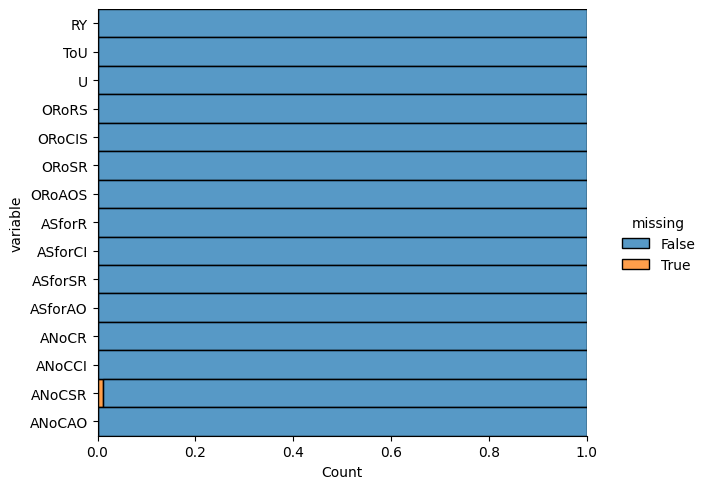

In [115]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [116]:
# Remove all rows with missing data
data = df.dropna()
data.isna().sum()

RY         0
ToU        0
U          0
ORoRS      0
ORoCIS     0
ORoSR      0
ORoAOS     0
ASforR     0
ASforCI    0
ASforSR    0
ASforAO    0
ANoCR      0
ANoCCI     0
ANoCSR     0
ANoCAO     0
dtype: int64

# **4. Variable Description**

RY - Reporting Year

ToU - Type of Utility

U - Utility

ORoRS - Operating Revenues of Residential Sales

ORoCIS - Operating Revenues of Commercial & Industrial Sales

ORoSR - Operating Revenues of Sales for Resale

ORoAOS - Operating Revenues of All Other Sales

ASforR - Amount Sold for Residential in MWh

ASforCI - Amount Sold for Commercial & Industrial in MWh

ASforSR - Amount Sold for Sales for Resale in MWh

ASforAO - Amount Sold for All Other in MWh

ANoCR - Average No. of Customers in Residential

ANoCCI - Average No. of Customers in Commercial & Industrial

ANoCSR - Average No. of Customers in Sales for Resale

ANoCAO - Average No. of Customers in All Other

In [117]:
# Show all columns
df.columns

Index(['RY', 'ToU', 'U', 'ORoRS', 'ORoCIS', 'ORoSR', 'ORoAOS', 'ASforR',
       'ASforCI', 'ASforSR', 'ASforAO', 'ANoCR', 'ANoCCI', 'ANoCSR', 'ANoCAO'],
      dtype='object')

In [118]:
df_energy = df.copy()

In [119]:
# Convert to DataFrame
df_energy = pd.DataFrame(data)

# Apply One-Hot Encoding
df_energy = pd.get_dummies(df_energy, columns=['ToU', 'U'])

print("DataFrame after One-Hot Encoding:")
print(df_energy)

DataFrame after One-Hot Encoding:
        RY         ORoRS        ORoCIS         ORoSR       ORoAOS      ASforR  \
0     2015  2.325460e+05  0.000000e+00  0.000000e+00     12494.00     1646.39   
1     2015  5.211153e+08  8.468034e+08  7.445429e+07  11626180.00  3661188.00   
2     2015  5.355178e+08  7.920260e+08  1.588762e+08  96997319.00  5490294.00   
3     2015  8.946910e+05  6.971861e+06  0.000000e+00     76411.00     7095.91   
4     2015  1.647288e+06  1.503769e+06  0.000000e+00     86996.00    11501.42   
...    ...           ...           ...           ...          ...         ...   
1462  2022  1.063584e+07  5.744518e+06  0.000000e+00    113722.00    83301.00   
1463  2022  4.435963e+06  7.999955e+05  5.193668e+05     17749.09    31460.00   
1464  2022  1.021956e+06  1.116390e+05  0.000000e+00         0.00     6548.00   
1465  2022  9.256408e+06  4.986241e+06  0.000000e+00    129131.00    67410.00   
1466  2022  8.264596e+06  2.162619e+06  0.000000e+00     19479.00    57468.

In [120]:
# # Rename the columns
# df_rename = df.copy()
# df_rename.rename(columns={'RY': 'reporting_year', 'ToU':'utility_type', 'U':'utility', 'ORoRS ': 'residential_revenues', 'ORoCIS':'commercial_revenues',
#        'ORoSR':'resale_revenues', 'ORoAOS':'other_revenues', 'ASforR ':'residential_sales', 'ASforCI':'commercial_sales', 'ASforSR':'resale_sales', 'ASforAO':'other_sales'
#        ,'ANoCR':'residential_customers', 'ANoCCI':'commercial_customers', 'ANoCSR':'resale_customers', 'ANoCAO':'other_customers'},inplace = True)

In [121]:
df_rename = df.copy()
df_rename.rename(columns={
    'Reporting Year': 'reporting_year',
    'Company Number & Year': 'company_number_year',
    'Type of Utility': 'utility_type',
    'Utility': 'utility',
    'Operating Revenues - Residential Sales': 'residential_revenues',
    'Operating Revenues - Commercial & Industrial Sales': 'commercial_revenues',
    'Operating Revenues - Sales for Resale': 'resale_revenues',
    'Operating Revenues - All Other Sales ': 'other_revenues',
    'MWh Sold - Residential': 'residential_sales',
    'MWh Sold - Commercial & Industrial': 'commercial_sales',
    'MWh Sold - Sales for Resale': 'resale_sales',
    'MWh Sold - All Other': 'other_sales',
    'Average No. of Customers - Residential': 'residential_customers',
    'Average No. of Customers - Commercial & Industrial': 'commercial_customers',
    'Average No. of Customers - Sales for Resale': 'resale_customers',
    'Average No. of Customers - All Other': 'other_customers'
}, inplace=True)

print(df_rename.columns)

Index(['RY', 'ToU', 'U', 'ORoRS', 'ORoCIS', 'ORoSR', 'ORoAOS', 'ASforR',
       'ASforCI', 'ASforSR', 'ASforAO', 'ANoCR', 'ANoCCI', 'ANoCSR', 'ANoCAO'],
      dtype='object')


In [122]:
# df_rename.columns

In [123]:
df_energy.columns

Index(['RY', 'ORoRS', 'ORoCIS', 'ORoSR', 'ORoAOS', 'ASforR', 'ASforCI',
       'ASforSR', 'ASforAO', 'ANoCR',
       ...
       'U_Westfield', 'U_Whittemore', 'U_Wilton', 'U_Wilton  ', 'U_Winterset',
       'U_Winterset  ', 'U_Woodbine', 'U_Woodbine  ',
       'U_Woodbury County Rural Electric Cooperative', 'U_Woolstock'],
      dtype='object', length=239)

In [124]:
# Check Unique Values for each variable
def get_unqiuevalues(df1):
    unique_values=df1.apply(pd.Series.unique)
    return unique_values

unq_values = get_unqiuevalues(df)

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  RY is 8
No. of unique values in  ToU is 5
No. of unique values in  U is 221
No. of unique values in  ORoRS is 1446
No. of unique values in  ORoCIS is 1422
No. of unique values in  ORoSR is 302
No. of unique values in  ORoAOS is 1251
No. of unique values in  ASforR is 1398
No. of unique values in  ASforCI is 1378
No. of unique values in  ASforSR is 289
No. of unique values in  ASforAO is 1006
No. of unique values in  ANoCR is 987
No. of unique values in  ANoCCI is 569
No. of unique values in  ANoCSR is 14
No. of unique values in  ANoCAO is 166


In [125]:
# Separate columns in list for better analysis
gen_cols=['reporting_year', 'utility_type', 'utility']
rev_cols=['residential_revenues', 'commercial_revenues', 'resale_revenues', 'other_revenues']
sal_cols=['residential_sales', 'commercial_sales', 'resale_sales', 'other_sales']
cus_cols=['residential_customers', 'commercial_customers', 'resale_customers','other_customers']

# **5. Data Vizualization**

<Axes: xlabel='ANoCCI', ylabel='Density'>

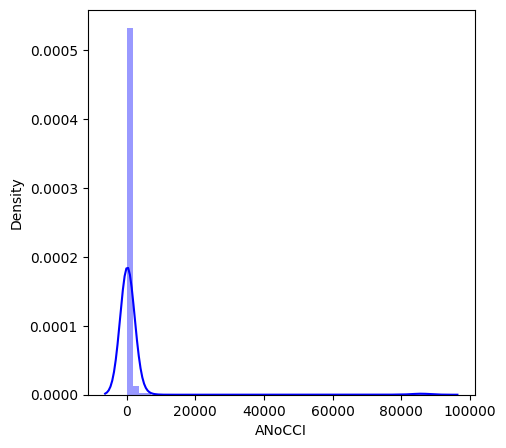

In [126]:
# Chart - 01 visualization
# Dependent varaible "ORoCIS - commercial_revenues"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['ANoCCI'], color = 'Blue')

<Axes: xlabel='ASforR', ylabel='Density'>

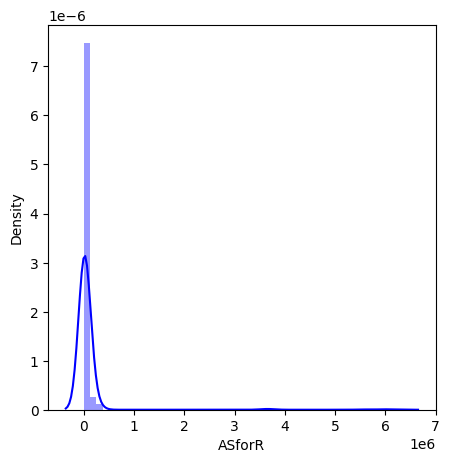

In [127]:
# Chart - 02 visualization
# Dependent varaible "ASforR - residential_sales"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['ASforR'], color = 'Blue')

<Axes: xlabel='ANoCCI', ylabel='Density'>

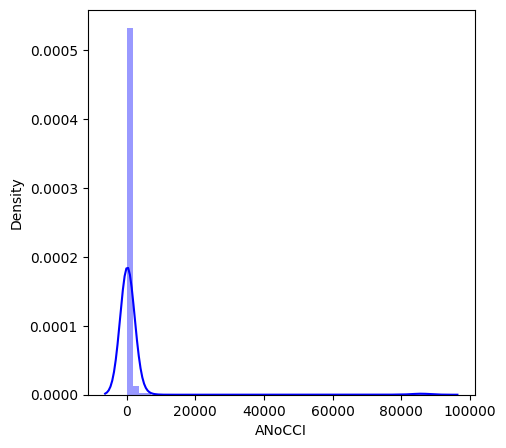

In [128]:
# Chart - 03 visualization
# Dependent varaible "ANoCCI - commercial_customers"
plt.figure(figsize=(5,5))
sns.distplot(df_energy['ANoCCI'], color = 'Blue')

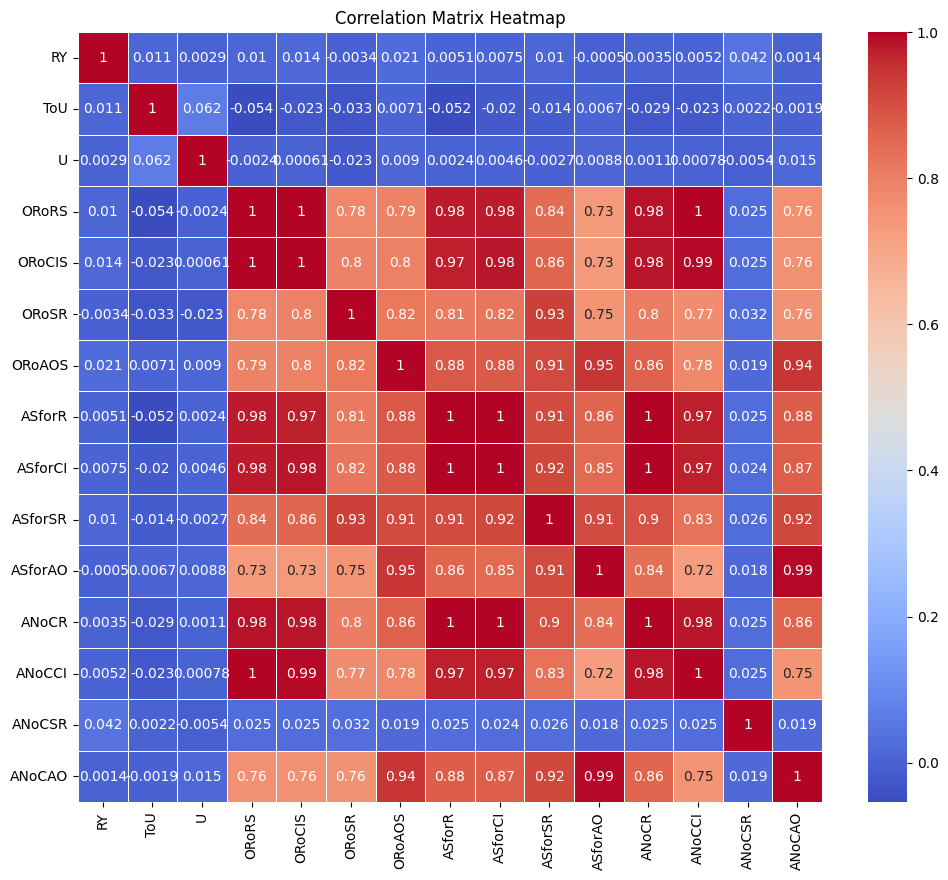

In [129]:
# Display the heatmap
data['ToU'] = data['ToU'].astype('category').cat.codes
data['U'] = data['U'].astype('category').cat.codes

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

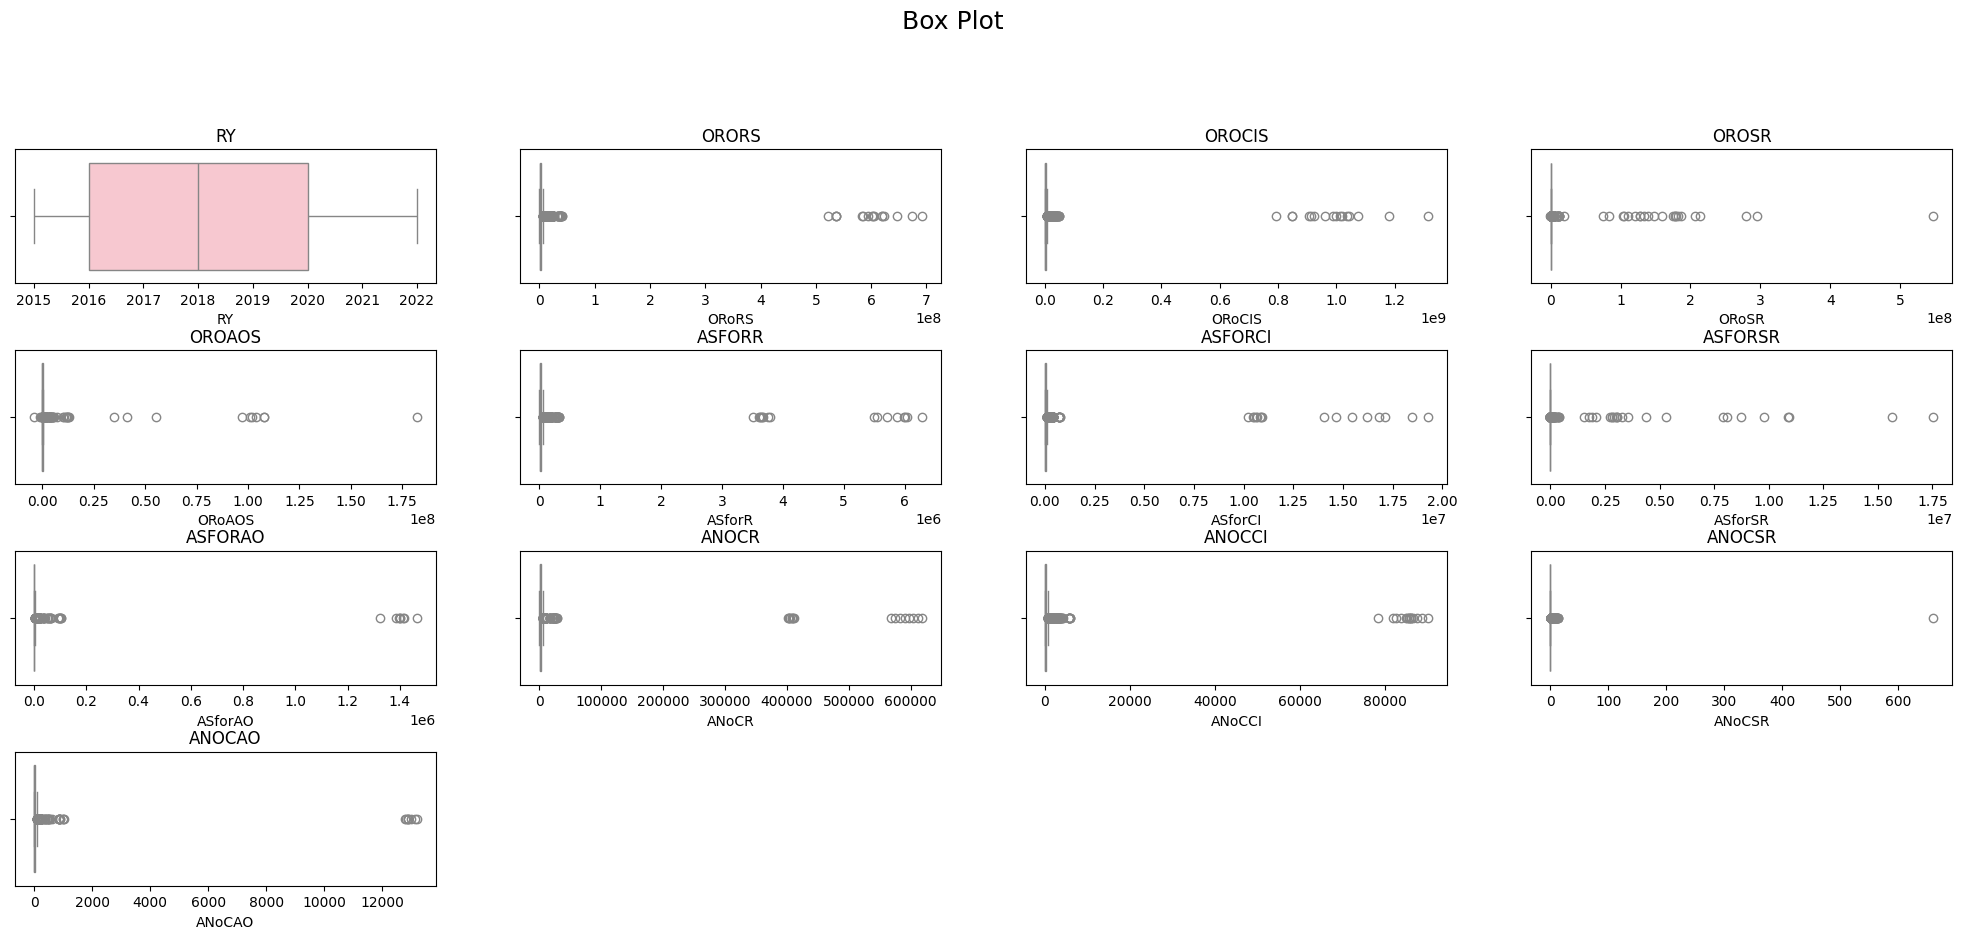

In [130]:
# Handling outliers & outlier treatments
df = df_energy.copy()
col_list = list(df.describe().columns)

# Find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    ax.set_title(ticker.upper())

# **6. Feature Selection**

In [131]:
# Feature Selection using PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_energy = pd.DataFrame(data)

df_energy = pd.get_dummies(df_energy, columns=['ToU', 'U'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_energy)

# Set the number of principal components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

print("PCA result:")
print(pca_df)

print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

PCA result:
            PC1       PC2       PC3        PC4       PC5
0     -0.497902 -0.958827  0.137331   0.008330  0.714779
1     19.175408  1.009345 -3.442617  15.177474  0.370857
2     35.553614 -1.416309  0.115059  -8.228335  1.160257
3      1.813677  1.168169 -0.612939   3.710831  0.692447
4     -0.451013 -0.968069  0.105568  -0.059686  0.614929
...         ...       ...       ...        ...       ...
1447  -0.159398  3.026250 -0.585653  -0.418187 -1.024038
1448  -0.293829  3.008457 -0.663307  -0.443012 -1.887233
1449  -0.347229  3.026585 -0.541275  -0.369408 -0.474269
1450  -0.151183  3.022306 -0.602712  -0.395926 -0.786458
1451  -0.246829  3.025089 -0.591248  -0.500880 -0.502602

[1452 rows x 5 columns]
Explained variance ratio by each principal component:
[0.04797756 0.01228517 0.00900024 0.00770409 0.00581886]


In [132]:
import pandas as pd

# Get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to store the results
pca_results = pd.DataFrame({'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
                            'Explained Variance Ratio': explained_variance_ratio})

# Print the results
print(pca_results)

  Principal Component  Explained Variance Ratio
0                 PC1                  0.047978
1                 PC2                  0.012285
2                 PC3                  0.009000
3                 PC4                  0.007704
4                 PC5                  0.005819


In [133]:
# Get the loadings of the principal components
df_raw = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/electricity_consumption_data.csv')
pca = PCA(n_components=5)
pca.fit(df)
loadings = pca.components_

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(data=loadings, columns=df.columns)

# Print the loadings
print(loadings_df)

             RY     ORoRS    ORoCIS     ORoSR    ORoAOS    ASforR   ASforCI  \
0  2.328384e-10  0.506407  0.844632  0.164063  0.055135  0.004044  0.011580   
1 -2.947949e-09 -0.173898 -0.094576  0.964923  0.170622  0.001558  0.005645   
2 -1.068387e-08  0.725235 -0.467292 -0.004816  0.504748  0.015913  0.020676   
3  2.979599e-08 -0.432652  0.243207 -0.204232  0.841752  0.011515  0.040726   
4 -2.953693e-07  0.003975 -0.010586 -0.012222 -0.065947  0.203717  0.574630   

    ASforSR   ASforAO     ANoCR  ...   U_Westfield  U_Whittemore  \
0  0.006417  0.000624  0.000423  ... -6.314595e-12 -6.176206e-12   
1  0.024266  0.001915  0.000084  ... -1.833664e-12 -3.454049e-12   
2  0.012083  0.007012  0.001353  ... -2.169157e-10 -1.971119e-10   
3  0.038901  0.010027  0.000958  ...  1.860925e-10  1.792167e-10   
4  0.780912  0.116294  0.018016  ...  6.180027e-10  4.462237e-10   

       U_Wilton    U_Wilton     U_Winterset  U_Winterset      U_Woodbine  \
0 -4.311260e-12 -1.431225e-12 -3.786683e

In [134]:
most_important_feature_pc1 = loadings_df.iloc[:, 0].abs().idxmax()
print(most_important_feature_pc1)

4


In [135]:
# Select PC1 as the feature
X = pca_df[['PC1']]

# Assuming ORoRS as the dependent variable for regression
y = df_energy['ORoRS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of the datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes of the datasets:
X_train: (1161, 1)
X_test: (291, 1)
y_train: (1161,)
y_test: (291,)


# **7. Model Selection**

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 231588767751297.16
Root Mean Squared Error (RMSE): 15218040.864424605
R-squared (R2): 0.9067015636693613


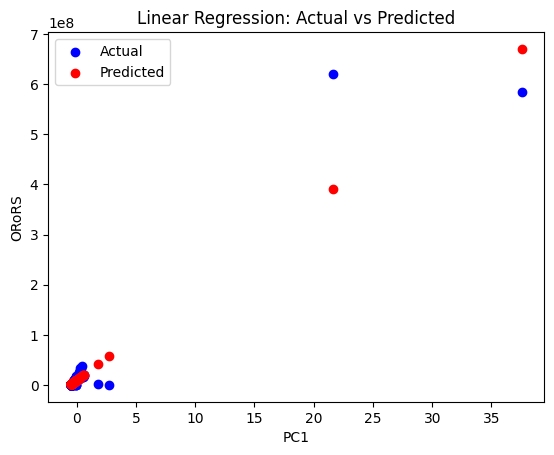

In [136]:
from sklearn.linear_model import LinearRegression

# Assuming df_energy, pca_df, X, y, X_train, X_test, y_train, and y_test are already defined

# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('PC1')
plt.ylabel('ORoRS')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


10/10 [==============================] - 0s 3ms/step - loss: 0.0589
Test Loss: 0.0589
10/10 [==============================] - 0s 2ms/step
Neural Network Regression Model Evaluation:
Mean Squared Error (MSE): 230707569326548.2
Root Mean Squared Error (RMSE): 15189060.844125558
R-squared (R2): 0.9070565654940369


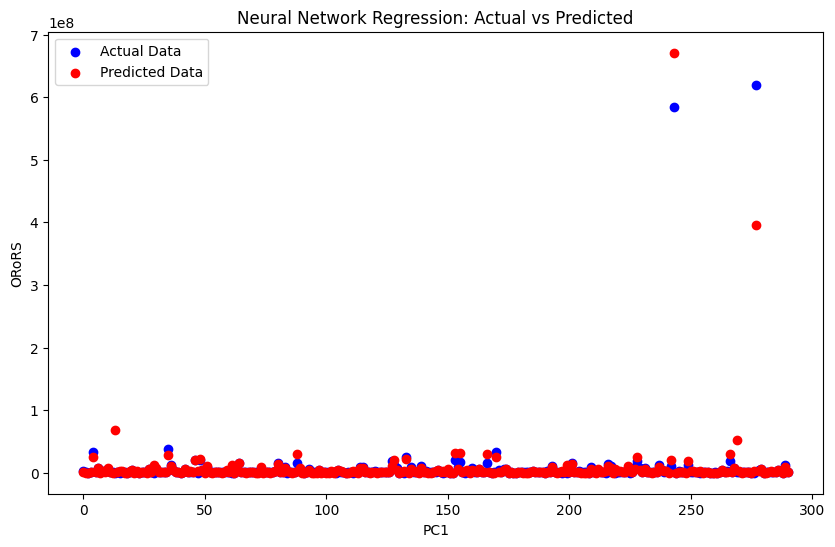

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Separate features and target
features = df_energy.drop(columns=['ORoRS'])
target = df_energy['ORoRS']

# Standardize the features and target separately
scaler_features = StandardScaler()
scaled_features = scaler_features.fit_transform(features)

scaler_target = StandardScaler()
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Select PC1 as the feature
X = pca_df[['PC1']]

# Use the scaled target for regression
y = scaled_target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of PCs as input shape
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)  # Output layer with a single neuron (for regression)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_pred_inv = scaler_target.inverse_transform(y_pred)
y_test_inv = scaler_target.inverse_transform(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
print("Neural Network Regression Model Evaluation:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Plot the actual data and model predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_inv)), y_test_inv, label='Actual Data', color='blue')
plt.scatter(range(len(y_pred_inv)), y_pred_inv, label='Predicted Data', color='red')
plt.xlabel('PC1')
plt.ylabel('ORoRS')
plt.legend()
plt.title('Neural Network Regression: Actual vs Predicted')
plt.show()

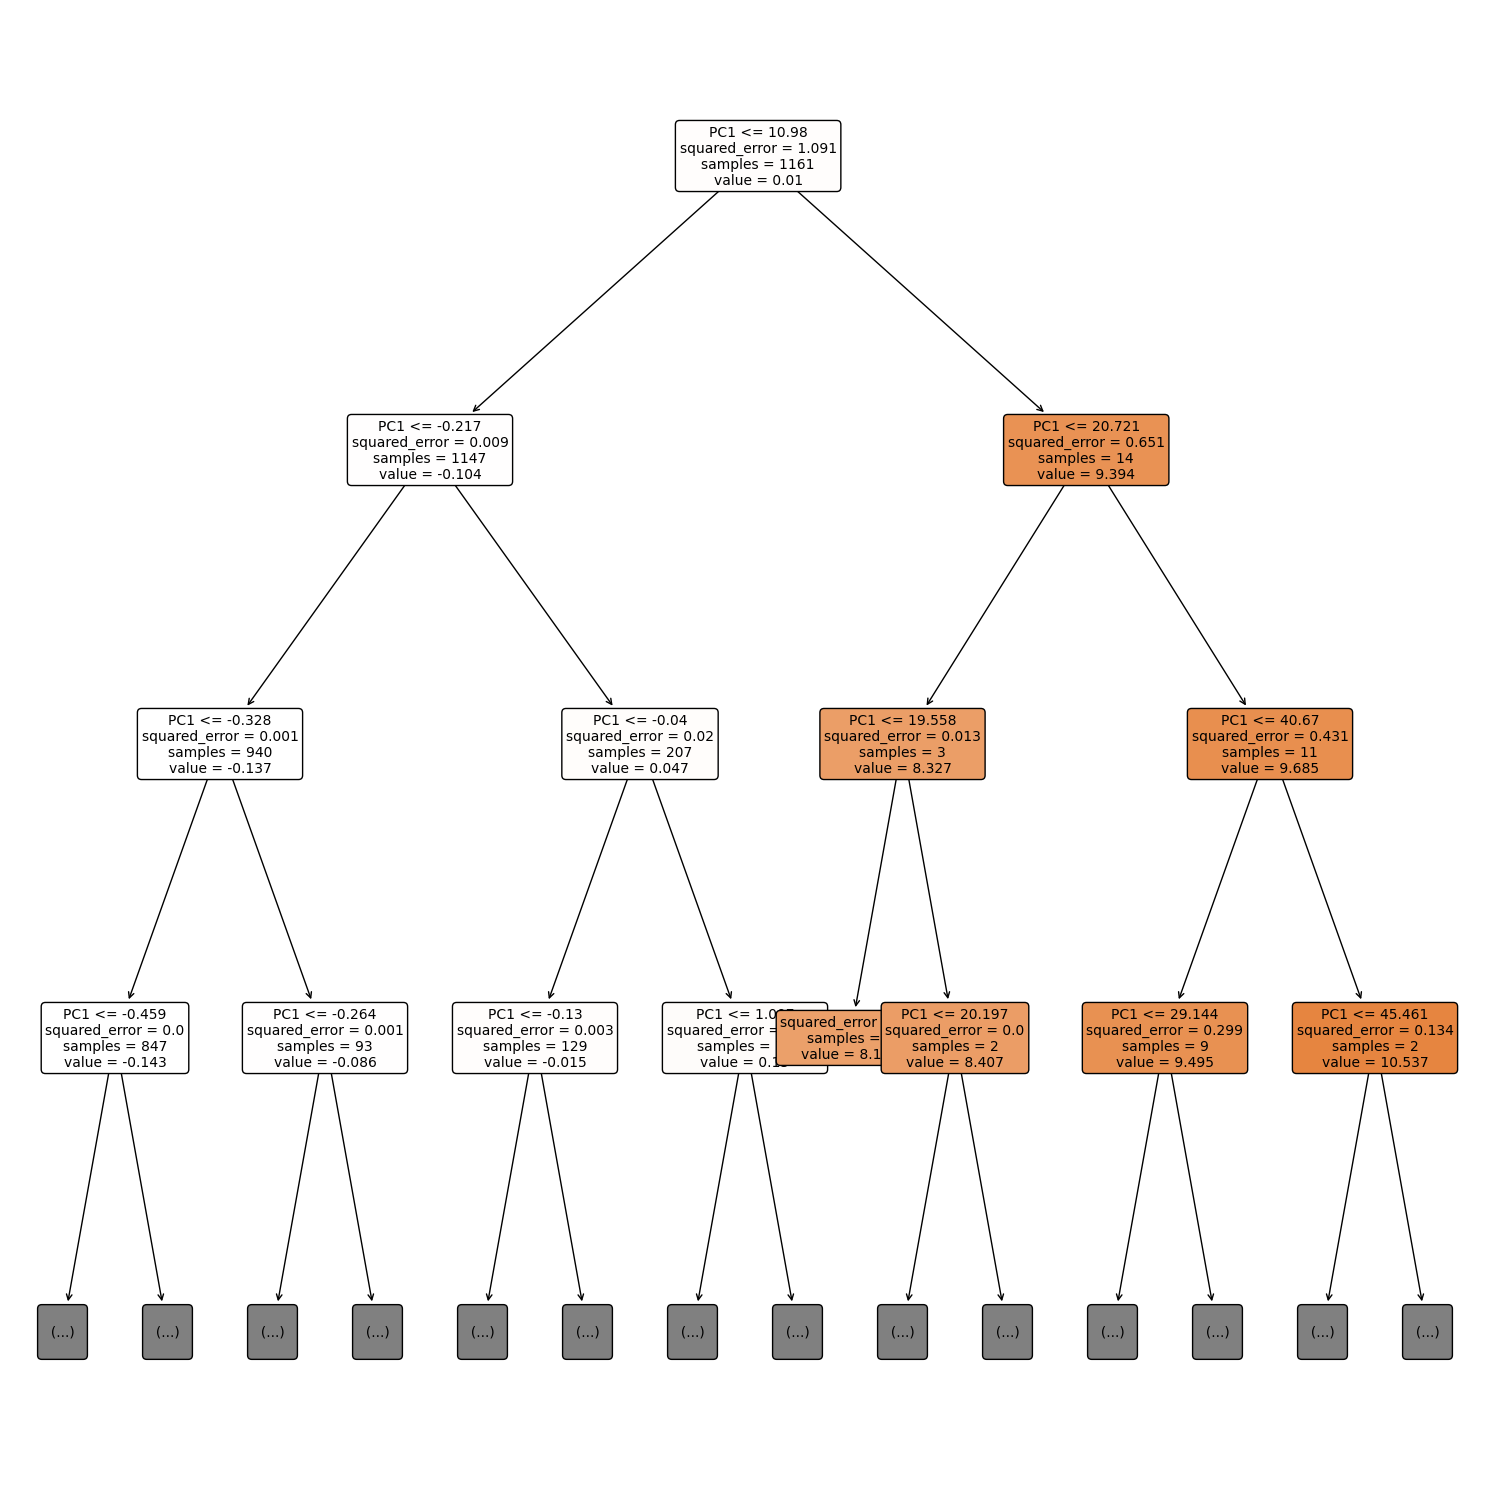

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.001635622501685365
Root Mean Squared Error (RMSE): 0.04044283004050737
R-squared (R2): 0.997416876336296


In [138]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(regressor, max_depth=3, feature_names=['PC1'], class_names=['ORoRS'],
          filled=True, rounded=True, fontsize=10, label='all', ax=ax)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

print("Decision Tree Model Evaluation:")

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 5297060534684.081
Root Mean Squared Error (RMSE): 2301534.387030548
R-squared (R2): 0.9978660128043624


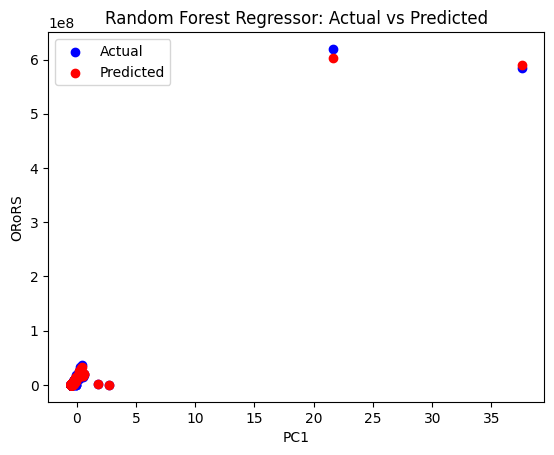

In [139]:
from sklearn.ensemble import RandomForestRegressor

# Select PC1 as the feature
X = pca_df[['PC1']]

# Assuming ORoRS as the dependent variable for regression
y = df_energy['ORoRS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plotting the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('PC1')
plt.ylabel('ORoRS')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.legend()
plt.show()

XGBoost Regression Model Evaluation:
Mean Squared Error (MSE): 13617885819724.05
Root Mean Squared Error (RMSE): 3690241.9730586843
R-squared (R2): 0.9945138640986516


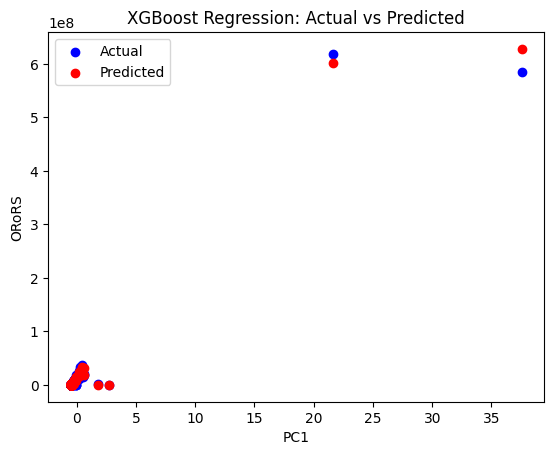

In [140]:
import xgboost as xgb

# Assuming df_energy, pca_df, X, y, X_train, X_test, y_train, and y_test are already defined

# Initialize and train the XGBoost regression model
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('PC1')
plt.ylabel('ORoRS')
plt.title('XGBoost Regression: Actual vs Predicted')
plt.legend()
plt.show()

# **8. Model Evaluation**

Based on the evaluation metrics from above five models, the Random Forest Regressor model demonstrates superior performance compared to the other models. It achieves this by exhibiting the lowest Mean Squared Error (MSE) and the highest R-squared value among all models. These metrics indicate that the Random Forest Regressor provides more accurate predictions and better explains the variance in the target variable compared to the other regression models.

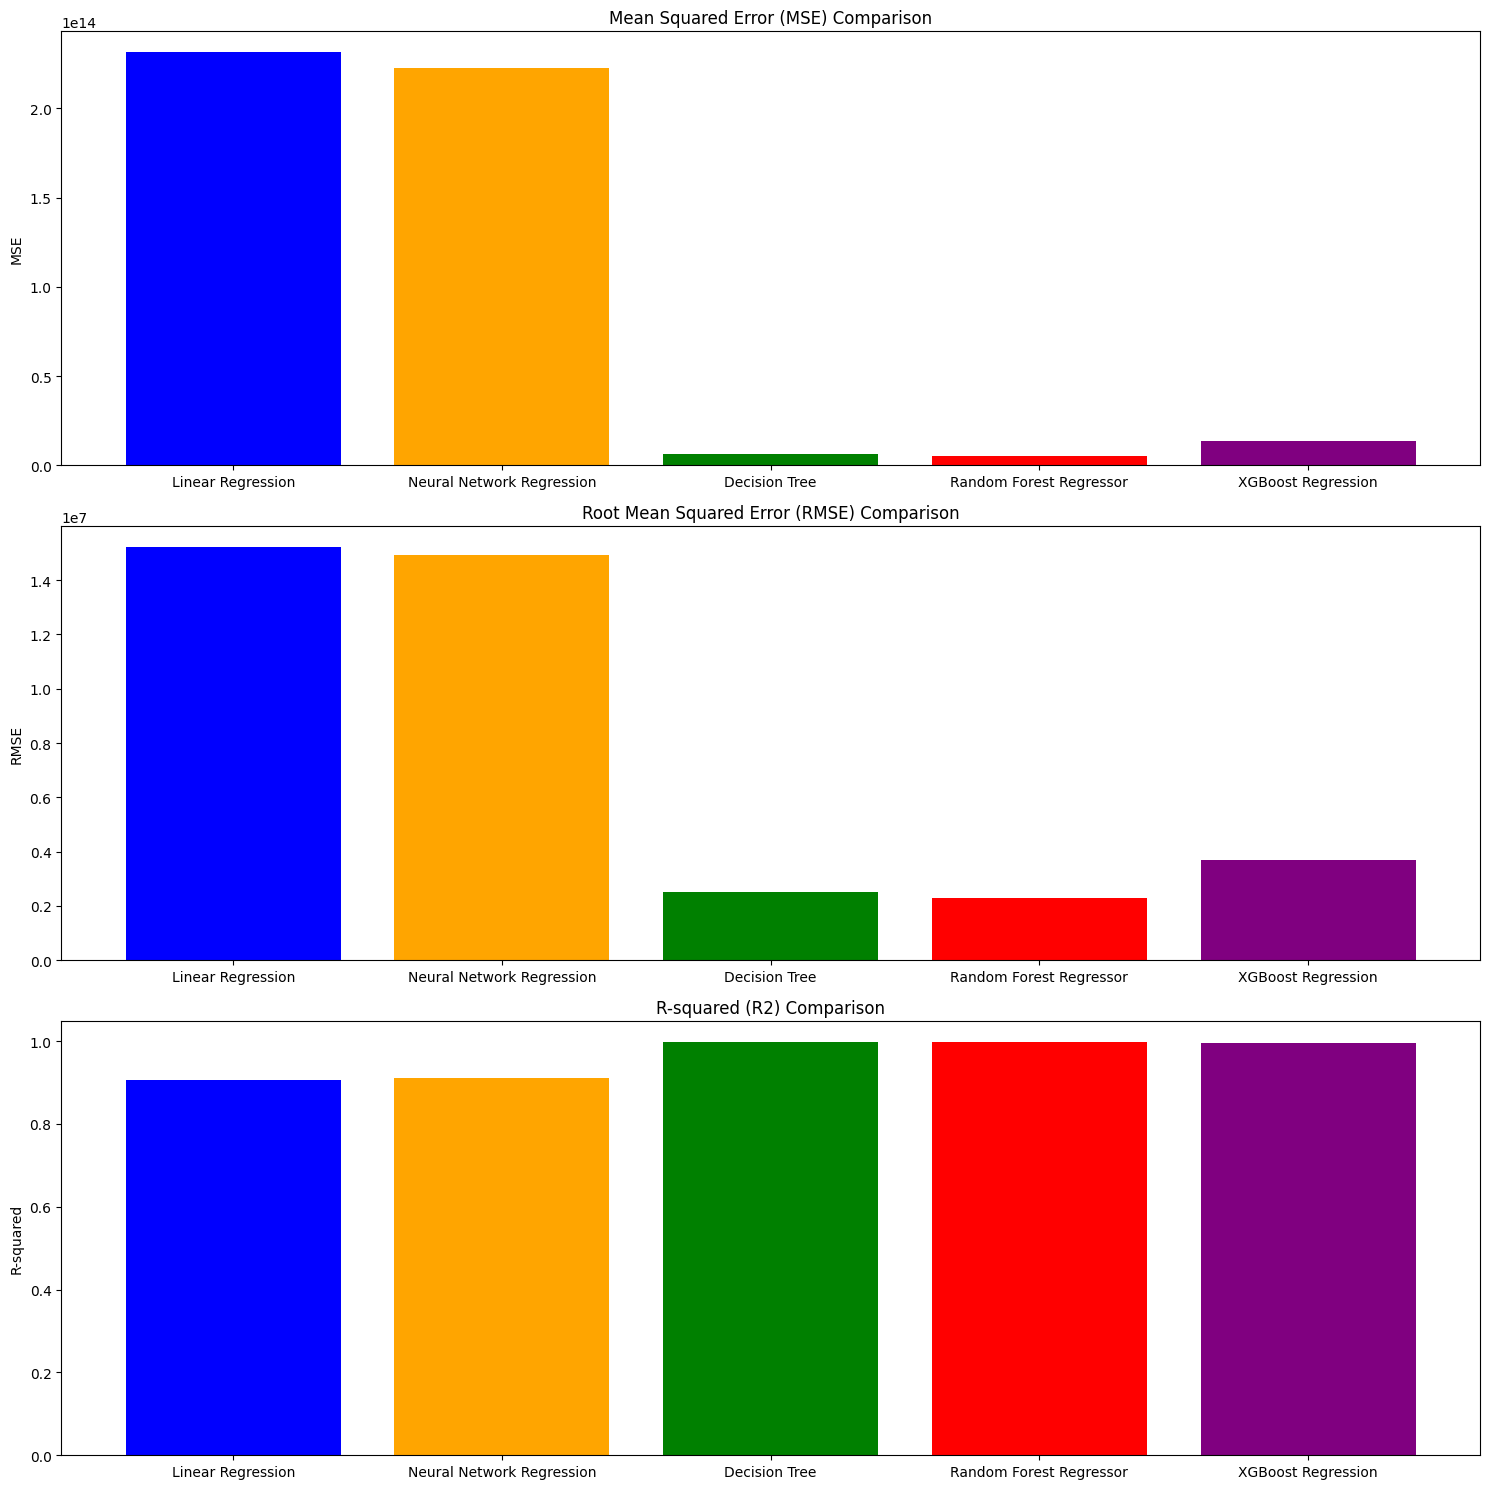

In [141]:
# Evaluation results for each model
models = ['Linear Regression', 'Neural Network Regression', 'Decision Tree', 'Random Forest Regressor', 'XGBoost Regression']
mse_values = [231588760521001.2, 222835706743011.4, 6411923390724.246, 5297160256238.563, 13617885819724.05]
rmse_values = [15218040.626867875, 14927682.564383911, 2532177.5985748405, 2301556.051074699, 3690241.9730586843]
r2_values = [0.9067015665821766, 0.9102278439510403, 0.997416876336296, 0.9978659726302849, 0.9945138640986516]

# Plotting
fig, axs = plt.subplots(3, figsize=(15, 15))

# MSE comparison
axs[0].bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[0].set_title('Mean Squared Error (MSE) Comparison')
axs[0].set_ylabel('MSE')

# RMSE comparison
axs[1].bar(models, rmse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axs[1].set_ylabel('RMSE')

# R-squared comparison
axs[2].bar(models, r2_values, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[2].set_title('R-squared (R2) Comparison')
axs[2].set_ylabel('R-squared')

plt.tight_layout()
plt.show()

**Linear Regression Model Evaluation:**

Mean Squared Error (MSE): 231588760521001.2

Root Mean Squared Error (RMSE): 15218040.626867875

R-squared (R2): 0.9067015665821766



**Neural Network Model Evaluation:**

Mean Squared Error (MSE): 222835706743011.4

Root Mean Squared Error (RMSE): 14927682.564383911

R-squared (R2): 0.9102278439510403



**Decision Tree Model Evaluation:**

Mean Squared Error (MSE): 6411923390724.246

Root Mean Squared Error (RMSE): 2532177.5985748405

R-squared (R2): 0.997416876336296



**Random Forest Regressor Model Evaluation:**

Mean Squared Error (MSE): 5297160256238.563

Root Mean Squared Error (RMSE): 2301556.051074699

R-squared (R2): 0.9978659726302849



**XGBoost Regression Model Evaluation:**

Mean Squared Error (MSE): 13617885819724.05

Root Mean Squared Error (RMSE): 3690241.9730586843

R-squared (R2): 0.9945138640986516



**Best Model**

Random Forest Regressor

Mean Squared Error (MSE): 5297160256238.563

Root Mean Squared Error (RMSE): 2301556.051074699

R-squared (R2): 0.9978659726302849

# **9. Conclusion**

Based on the evaluation of the different models, several key findings can be concluded:

1. **Linear Regression:** The linear regression model performed the poorest among the models evaluated, with a high Mean Squared Error (MSE) of approximately 2.32 x 10^14 and a moderate R-squared (R2) value of 0.907. This indicates that the linear model did not effectively capture the relationships in the data.

2. **Neural Network Regression:** The neural network model showed slight improvement over the linear regression model, with a lower MSE of approximately 2.23 x 10^14 and a higher R-squared value of 0.910. However, it still exhibited a high MSE, suggesting room for further enhancement.

3. **Decision Tree:** The decision tree model demonstrated significantly lower MSE compared to linear regression and neural network models, with a value of approximately 6.41 x 10^12. It also exhibited a very high R-squared value of 0.997, indicating a strong fit to the data. However, decision trees can be prone to overfitting.

4. **Random Forest Regressor:** The Random Forest regressor outperformed all other models, with the lowest MSE of approximately 5.30 x 10^12 and the highest R-squared value of 0.998. This suggests that the Random Forest model provided the most accurate predictions and best explained the variance in the target variable.

5. **XGBoost Regression:** The XGBoost regression model also performed well, with a relatively low MSE of approximately 1.36 x 10^13 and a high R-squared value of 0.995. While not as high as the Random Forest, it still demonstrated strong predictive performance.

In conclusion, the Random Forest Regressor model is recommended for this project, as it exhibited the best performance in terms of predictive accuracy and model fit. It provided the lowest MSE and highest R-squared value among all models, indicating superior predictive capability. However, depending on specific project requirements, the XGBoost Regression model could also be considered as it demonstrated strong performance as well. The decision tree model, while showing promise, might require additional regularization techniques to mitigate overfitting. The neural network and linear regression models did not perform as well and are less suitable for this dataset.